tutorial -         
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/32296/         
新增特殊字元to stopwords.txt

In [1]:
num_classes = 4

num_DocsInClass = [9,22,10,14]  #training set

num_AllDocs = sum(num_DocsInClass)

prior_prob = []
for i in range(num_classes):
    prior_prob.append(num_DocsInClass[i] / num_AllDocs)
print(prior_prob)

[0.16363636363636364, 0.4, 0.18181818181818182, 0.2545454545454545]


### Extract terms
jieba

In [2]:
import pandas as pd
from urllib.request import urlopen
import numpy as np
import jieba
import re
import os
import emoji

'''userdict'''
jieba.set_dictionary('./dict.txt.big.txt')
jieba.load_userdict('./userdict.txt')

'''stopword list'''
stopword_list = []
with open('stopwords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopword_list.append(data)

#term
dictionary = list()  #terms, df
class_TFlist = list()  #(terms, tf in that doc)
class_DFlist = list()  #(terms, tf in that doc)
doc_tokens_list = []
class_tokens_list = []
N = num_AllDocs

for classes in range(num_classes):  #num_classes, 4 
    class_TFdict = dict()
    class_DFdict = dict()
    
    
    '''get the files under the directory'''''''''
    for info in os.listdir(r'./data_posts/'+str(classes+1)): #1,2,3,4      
        doc_has_word = list()  
        post1 = pd.read_csv('data_posts/{}/{}'.format(str(classes+1),info), encoding="utf-8", dtype=str) 
        
        temp_tokens_list = []
        # for each row
        for i in range(post1.shape[0]):  
            text = ''
            try:
                words = post1['post_caption'][i]
                text = text + words + " "   
            except:
                None
                           
            # Remove emoji
            text = emoji.demojize(text)
            # Remove English words & numbers
            #text = re.sub("[A-Za-z0-9\!\%\[\]\,\。\-\#\?\/]", "", text) 
            text = re.sub("[A-Za-z0-9\!\%\[\]\,\。\-\#\?\/\.\_\“\”\、]", "", text) 
            # Remove the redundant spaces
            text = re.sub(r'\s\s+',' ', text)   
            # print(info, text)

            '''Tokenize'''
            tokens_list = jieba.lcut(text, cut_all=False)
            # print(tokens_list)
            
            '''remove stopwords'''
            indx1 = 0
            while indx1 < len(tokens_list):
                if tokens_list[indx1] in stopword_list or tokens_list[indx1]==' ' or tokens_list[indx1]=='\n':
                    del tokens_list[indx1]
                else:
                    if tokens_list[indx1] in class_TFdict:      #term freq of that class
                        class_TFdict[tokens_list[indx1]] += 1
                    else:
                        class_TFdict[tokens_list[indx1]] = 1
                        if tokens_list[indx1] not in dictionary:        
                            dictionary.append(tokens_list[indx1]) 
                    if tokens_list[indx1] not in doc_has_word:
                        if tokens_list[indx1] in class_DFdict:     #(term,一class中有幾篇文件有該term)    
                            class_DFdict[tokens_list[indx1]] += 1
                        else:
                            class_DFdict[tokens_list[indx1]] = 1  
                        doc_has_word.append(tokens_list[indx1])
                    indx1 += 1
            temp_tokens_list.extend(tokens_list)
        doc_tokens_list.append(temp_tokens_list)
    class_tokens_list.append(doc_tokens_list)     
             
    class_TFdict = sorted(class_TFdict.items(), key=lambda d: d[1], reverse = True)
    class_TFlist.append(class_TFdict)     
    class_DFdict = sorted(class_DFdict.items(), key=lambda d: d[1], reverse = True)       
    class_DFlist.append(class_DFdict)   
     
        
dictionary = sorted(dictionary) 
print(len(dictionary))
print(len(class_TFlist))
print(len(class_DFlist))            


Building prefix dict from C:\Users\aduser01\Desktop\IRTM\Final Project\NaiveBayes\dict.txt.big.txt ...
Loading model from cache C:\Users\aduser01\AppData\Local\Temp\jieba.u5d7072edb4d70e1372a6972f753c6c78.cache
Loading model cost 1.051 seconds.
Prefix dict has been built succesfully.


34372
4
4


In [3]:
for i in range(num_classes):
    print(class_TFlist[i][:100])

[('真的', 662), ('沒有', 306), ('會', 305), ('說', 289), ('想', 251), ('謝謝', 243), ('妳們', 232), ('一起', 229), ('覺得', 214), ('喜歡', 197), ('知道', 188), ('沒', 182), ('希望', 167), ('今天', 162), ('很多', 155), ('吃', 147), ('一直', 145), ('超', 137), ('最後', 128), ('其實', 123), ('走', 121), ('做', 117), ('感覺', 116), ('看到', 115), ('不要', 113), ('現在', 111), ('感謝', 111), ('照片', 109), ('時間', 107), ('第一次', 107), ('不會', 105), ('可愛', 104), ('開心', 102), ('快樂', 102), ('拍', 93), ('發現', 91), ('好像', 91), ('太', 89), ('愛', 88), ('大概', 87), ('一天', 87), ('老師', 86), ('中', 82), ('事', 81), ('應該', 77), ('一次', 76), ('事情', 76), ('好好', 76), ('東西', 74), ('更', 72), ('一下', 71), ('可能', 71), ('學妹', 70), ('幫', 69), ('玩', 69), ('生活', 68), ('記得', 67), ('之後', 66), ('完', 66), ('加油', 65), ('前', 65), ('感動', 65), ('辛苦', 65), ('努力', 63), ('有點', 62), ('一定', 61), ('不能', 61), ('好吃', 61), ('找', 60), ('地方', 60), ('朋友', 59), ('拍照', 59), ('已經', 58), ('這是', 58), ('快', 58), ('好多', 58), ('超級', 58), ('每天', 58), ('聽', 58), ('起來', 57), ('笑', 57), ('一點', 57), ('

In [4]:
'''write dictionary to txt'''
text_file = open( "output_dictionary.txt", "w")
for indx in range(len(dictionary)): 
    try:
        text_file.write(dictionary[indx] + '\n')     # the actual doc_id   
    except:
        None
text_file.close()


'''過濾掉非中文字'''
for i in range(1):    ######## num_classes
    indx = 0
    while indx < len(class_TFlist[i]):
        if class_TFlist[i][indx][0] in dictionary[:389]:
            del class_TFlist[i][indx]
        else:
            indx += 1
    indx = 0
    while indx < len(class_DFlist[i]):
        if class_DFlist[i][indx][0] in dictionary[:389]:
            del class_DFlist[i][indx]
        else:
            indx += 1
            
dictionary

In [5]:
class_DFlist[0][57]

('時', 8)

## Feature Extraction (top 1000 terms)
Likelihood Ratios     
-2log(L(H1) / L(H2))

In [6]:
''' build matrix '''
appear_mtrx = np.zeros((len(dictionary),num_classes))  #class中有某term的文章數量

for class_idx in range(num_classes):
    for term_idx in range(len(class_DFlist[class_idx])): # 726 terms in class 1
        indxxx = dictionary.index(class_DFlist[class_idx][term_idx][0])
        appear_mtrx[indxxx][class_idx] = class_DFlist[class_idx][term_idx][1]  

''' likelyhood ratios '''
likelyhood_ratios = np.zeros((len(dictionary),num_classes))
for term_idx in range(appear_mtrx.shape[0]): # all terms
    for class_idx in range(num_classes):   
        N11 = appear_mtrx[term_idx][class_idx]  #t在c中出現篇數
        N10 = num_DocsInClass[class_idx] - N11
        N01 = sum(appear_mtrx[term_idx][:]) - N11
        N00 = num_AllDocs - num_DocsInClass[class_idx] - N01
        # print(N11 + N01 + N00 + N10)
        likelyhood_ratios[term_idx][class_idx] = -2*np.log10(np.power( (N11+N01)/num_AllDocs, N11 )*
                                                             np.power( 1-(N11+N01)/num_AllDocs, N10 )*
                                                             np.power( (N11+N01)/num_AllDocs, N01 )*
                                                             np.power( 1-(N11+N01)/num_AllDocs, N00 )/
                                                             np.power( N11/(N11+N10), N11 )/
                                                             np.power( 1-N11/(N11+N10), N10 )/
                                                             np.power( N01/(N01+N00), N01 )/
                                                             np.power( 1-N01/(N01+N00), N00 ))
#class_TFlist[0][150][0] # term
#class_TFlist[0][150][1] # class' tf    

''' Feature Selection for Multiple Classifiers '''
'''全部一起選topk個'''
#class_TFlist[0][150][0] # term
#class_TFlist[0][150][1] # class' tf    

#''' Feature Selection for Multiple Classifiers '''
#mean_array = np.zeros(likelyhood_ratios.shape[0])
#for i in range(likelyhood_ratios.shape[0]):
#    mean_array[i] = np.mean(likelyhood_ratios[i][:])
#
#top_k = 150
#top_k_idx = mean_array.argsort()[::-1][0:top_k]


''' chi-square ratios '''
chi_square_ratios = np.zeros((len(dictionary),num_classes))
for term_idx in range(appear_mtrx.shape[0]): # all terms
    for class_idx in range(num_classes):   
        N11 = appear_mtrx[term_idx][class_idx]  #t在c中出現篇數
        N10 = num_DocsInClass[class_idx] - N11
        N01 = sum(appear_mtrx[term_idx][:]) - N11
        N00 = num_AllDocs - num_DocsInClass[class_idx] - N01
        N = N11+N10+N01+N00
        present_ratio = (N11+N10)/N
        on_topic_ratio = (N11+N01)/N
        non_present_ratio = (N01+N00)/N
        not_on_topic_ratio = (N10+N00)/N
        exp1 = N * present_ratio * on_topic_ratio
        exp2 = N * present_ratio * not_on_topic_ratio
        exp3 = N * non_present_ratio * on_topic_ratio
        exp4 = N * non_present_ratio * not_on_topic_ratio
        chi_square_ratios[term_idx][class_idx] = np.power(N11-exp1,2)/exp1 + np.power(N10-exp2,2)/exp2 + np.power(N01-exp3,2)/exp3 + np.power(N00-exp4,2)/exp4
# print(len(likelyhood_ratios))
# print(len(chi_square_ratios),chi_square_ratios)



'''each class 選topk個，再合併(remove duplicate)'''
top_k = 120
top_k_idx = []
each_class_top = []
for class_idx in range(num_classes):
    mean_array = likelyhood_ratios[:,class_idx]
    #mean_array = chi_square_ratios[:,class_idx]
    print(mean_array)
    class_top = mean_array.argsort()[::-1][0:top_k] 
    
    #print(class_top[:20])
    
    temp_top = []
    for origin_idx in class_top:
        temp_top.append(dictionary[origin_idx])
    print(temp_top)
    each_class_top.append(temp_top)
    
    top_k_idx.extend( class_top )

    
top_k_idx = list(set(top_k_idx))    # remove duplicate
print(len(top_k_idx))
top_k = len(top_k_idx)

[0.31676868 0.15677551 0.15677551 ... 0.15677551 0.77961693 0.31676868]
['太好', '茶', '回', '早上', '蛋糕', '普通', '網美', '起來', '獲得', '共識', '小型', '拍出', '縫', '酸奶', '放手', '半日', '後院', '服儀', '有名', '流星雨', '順帶', '以後', '談論', '貓貓', '澎湖', '歡迎', '五年', '兩週', '便宜', '新', '懶得', '推', '隨便', '認識', '這是', '找', '發現', '大學', '手機', '到底', '背影', '地獄', '星星', '床上', '居然', '滑', '這件', '搭', '學會', '揍', '計較', '外國人', '臺南', '組織', '地鐵', '受控', '木頭', '發生', '幾乎', '旁邊', '出門', '自然', '早點', '愉快', '停', '再度', '泡', '過了', '原來', '晚上', '優秀', '日期', '值', '抹', '第二', '變好', '很會', '太', '一次', '發文', '討厭', '裡面', '早', '穿', '後悔', '糖餅', '範本', '噴的', '奇聞', '只帶', '顆', '平常心', '三週', '作美', '操控', '初見', '瓶蓋', '掩埋', '在讀', '這好', '頭還', '巴士', '計程', '賴', '上升', '潛水', '頭才', '真爽', '擲', '紫色', '血檢', '好山好水', '蟬聯', '超低', '防備', '棄養', '叮叮', '真糟', '混入', '七美']
[ 0.03682469  0.44904836  0.80798221 ...  0.80798221 -0.
  1.64125554]
['服裝', '還我', '雀躍', '很常', '跟上', '泰國', '失誤', '理智', '油', '拔', '弟妹', '性感', '完好', '還買', '班導', '按摩', '即時', '咻', '落幕', '辦得', '堂', '嗨', '草', '洗澡', '香蕉', '基本上'

In [7]:
print(len(likelyhood_ratios))
print(len(chi_square_ratios),chi_square_ratios)

34372
34372 [[0.40607055 0.08647799 0.46121593 0.65898034]
 [0.19927536 0.67901235 4.58333333 0.34778681]
 [0.19927536 1.52777778 0.22633745 0.34778681]
 ...
 [0.19927536 1.52777778 0.22633745 0.34778681]
 [2.24516908 0.         1.22222222 0.08623693]
 [0.40607055 3.11320755 0.46121593 0.70869765]]


In [8]:
#top_k_idx = sorted(top_k_idx)
fea_extr_dictionary = []

for origin_idx in top_k_idx:
    fea_extr_dictionary.append(dictionary[origin_idx])
    #fea_extr_dictionary.append((dictionary[origin_idx], origin_idx))  #原本的index
print(fea_extr_dictionary)
# 

['外國人', '晚上', '拍出', '實際上', '外文', '台北市', '五天', '網美', '五年', '真', '責任', '拍照', '貴人', '普通', '燈光', '共識', '緊繃', '拔', '景象', '共鳴', '從沒', '緣分', '真爽', '暑假', '真糟', '貼心', '暖', '緩步', '眼', '練個', '再度', '還想', '還我', '練舞', '氣質', '縫', '音樂', '心力', '睡著', '賴', '夜市', '總是', '心情', '總覺', '合照', '按摩', '夠', '順利', '順帶', '還能', '爸爸', '知足', '心裡', '求救', '還買', '大一', '大一上', '冷氣', '決定', '走過', '決賽', '小型', '研究', '起來', '捷運', '砲', '小女孩', '掃', '置信', '小屁孩', '頭才', '沒事', '超低', '頭還', '排斥', '小時候', '大學', '一日遊', '蛋糕', '顆', '介紹', '超好', '沒好', '美國', '沒少', '出門', '沒想', '一次', '會員', '一歲', '吵', '一段時間', '願意', '會想', '狂', '接力', '吹', '蟬聯', '群組', '控', '以後', '性感', '推', '會點', '小隊', '越來越少', '血檢', '一職', '少', '社長', '掩埋', '沙拉', '少少的', '行事', '有名', '初見', '揍', '一起', '油', '一路', '大軍', '獲得', '酸奶', '泡', '一題', '到底', '咻', '泡麵', '福利社', '衣服', '飽飽', '一點點', '衣褲', '屁股', '表情', '揪', '禮拜五', '跟上', '居然', '表達', '哈哈哈哈', '泰勒', '衰', '泰國', '七美', '秀', '展', '哥哥', '三兩下', '重新', '玩耍', '服儀', '洗澡', '山', '服裝', '搭', '重責大任', '太', '山腳', '香蕉', '前奏', '耐心', '班導', '馬克', '馬尾', '搶', '三星', '量',

目前參數    
num_classes = len(training_doc)       
num_AllDocs = sum(num_DocsInClass)  #195          
           
num_DocsInClass   # [15,15,15...,15]        
prior_prob        # [0.076,0.076,0.076...,0.076]         
        
dictionary  # term       
class_TFlist[0][150][1] # class, class' term. its tf         
class_DFlist[0][150][1]         
fea_extr_dictionary # term, 原本Index       

## Training: "condprob" matrix

In [9]:
condprob = np.zeros((top_k, num_classes))

for class_idx in range(num_classes):  
    T_ct = list()  
    termOfClass = list()
    for temp_i in range(len(class_TFlist[class_idx])):
        termOfClass.append(class_TFlist[class_idx][temp_i][0])
        
    for term in fea_extr_dictionary: # all terms
        if term in termOfClass:
            idxInClass = termOfClass.index(term)
            T_ct.append( class_TFlist[class_idx][idxInClass][1])    
        else:
            T_ct.append(0)
    # print(len(T_ct))
    totalWordsInClass = np.sum(T_ct)
    
    for i in range(len(fea_extr_dictionary)): # all terms
        condprob[i][class_idx] = (T_ct[i]+1)/(totalWordsInClass+top_k)


## validation

In [10]:
len(each_class_top[3])

120

In [11]:
for i, each_doc in enumerate(doc_tokens_list):
    print("doc  "+str(i+1))
    count = 0
    for word in each_doc:
        if word in each_class_top[0]:
            count += 1
    print(count)
    count = 0
    for word in each_doc:
        if word in each_class_top[1]:
            count += 1
    print(count)
    count = 0
    for word in each_doc:
        if word in each_class_top[2]:
            count += 1
    print(count)
    count = 0
    for word in each_doc:
        if word in each_class_top[3]:
            count += 1
    print(count)
# num_DocsInClass = [9,22,12,15]  

doc  1
39
7
7
48
doc  2
97
1
26
114
doc  3
487
37
178
1176
doc  4
204
12
91
491
doc  5
137
0
38
148
doc  6
130
5
35
230
doc  7
76
0
18
92
doc  8
127
2
40
283
doc  9
304
17
135
765
doc  10
106
60
56
409
doc  11
2
1
0
8
doc  12
165
49
67
417
doc  13
0
0
3
7
doc  14
8
9
11
37
doc  15
268
100
122
663
doc  16
967
283
516
3042
doc  17
0
0
0
1
doc  18
29
19
19
138
doc  19
381
116
197
1099
doc  20
18
11
8
82
doc  21
4
8
2
27
doc  22
576
160
302
1367
doc  23
28
16
16
98
doc  24
16
11
11
52
doc  25
41
17
17
110
doc  26
8
4
13
33
doc  27
193
64
128
637
doc  28
159
90
115
485
doc  29
14
9
5
56
doc  30
20
13
24
124
doc  31
18
10
9
68
doc  32
49
3
24
177
doc  33
49
5
13
142
doc  34
32
7
19
130
doc  35
0
0
0
15
doc  36
35
3
14
119
doc  37
8
0
2
14
doc  38
215
14
65
583
doc  39
37
0
22
154
doc  40
3
0
2
25
doc  41
57
0
30
141
doc  42
2
0
2
2
doc  43
0
1
5
0
doc  44
30
1
24
95
doc  45
5
0
13
33
doc  46
47
3
23
62
doc  47
4
1
2
23
doc  48
0
0
0
0
doc  49
36
3
37
86
doc  50
0
1
3
0
doc  51
165
13
68
405


In [12]:
import csv
for info in os.listdir(r'./validation_posts/'): #info
    tokens = list()                   ################
    score = np.zeros(num_classes)
    post1 = pd.read_csv('validation_posts/{}'.format(info), encoding="utf-8", dtype=str)        
    # for each row
    for i in range(post1.shape[0]):  
        text = ''
        try:
            words = post1['post_caption'][i]
            text = text + words + " "   
        except:
            None
        text = emoji.demojize(text)
        text = re.sub("[A-Za-z0-9\!\%\[\]\,\。\-\#\?\/\.\_\“\”\、]", "", text)
        text = re.sub(r'\s\s+',' ', text)   
        tokens_list = jieba.lcut(text, cut_all=False)
        indx1 = 0
        for word in tokens_list:
            if word not in stopword_list or tokens_list[indx1]!=' ':
                tokens.append(word)  

    '''classification'''
    # 4 classes, count 4 probabilities P(c|d) ~> P(c)*P(d|c)
    for classes in range(num_classes):
        score[classes] = np.log10(prior_prob[classes])
        for word in tokens: 
            if word in fea_extr_dictionary:     #else:ignore
                idxx = fea_extr_dictionary.index(word)
                score[classes] += np.log10(condprob[idxx][classes]) 

    # print(score)
    predict_class = np.argmax(score)
    # print('predicted class ID of doc.', doc_id,':', predict_class + 1)  #ID: 1~13

    with open('validation_output.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)          # 建立CSV檔寫入器
        writer.writerow( [info[:-4], info[:1], predict_class+1] )


#### F1 score

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score

post = pd.read_csv('validation_output likelyhood.csv', encoding="utf-8", dtype=str)        
y_true = post['classification']    
y_pred1 = post['chi-square']    
y_pred2 = post['likelyhood']    

#chi-square
f1 = f1_score( y_true, y_pred1, average='macro' )
p = precision_score(y_true, y_pred1, average='macro')
r = recall_score(y_true, y_pred1, average='macro')
print(f1, p, r)

#likelyhood
f1 = f1_score( y_true, y_pred2, average='macro' )
p = precision_score(y_true, y_pred2, average='macro')
r = recall_score(y_true, y_pred2, average='macro')
print(f1, p, r)

0.7977941176470588 0.8474137931034482 0.7772727272727273
0.8700912635123161 0.8660839160839161 0.875974025974026


chi-square


likelyhood
0.7595238095238095 0.7916666666666666 0.7499999999999999

## Classification (Testing)

In [ ]:
import csv
''' Extract Tokens From Doc'''   
# get the files under the directory
test_cat = ['athlete','celebrity','politician','writer','youtuber']
for cat in test_cat:
    for info in os.listdir(r'./test_posts/{}/'.format(cat)): #info
        tokens = list()                   ################
        score = np.zeros(num_classes)
        post1 = pd.read_csv('test_posts/{}/{}'.format(cat,info), encoding="utf-8", dtype=str)        
        # for each row
        for i in range(post1.shape[0]):  
            text = ''
            try:
                words = post1['post_caption'][i]
                text = text + words + " "   
            except:
                None
            text = emoji.demojize(text)
            text = re.sub("[A-Za-z0-9\!\%\[\]\,\。\-\#\?\/\.\_\“\”\、]", "", text)
            text = re.sub(r'\s\s+',' ', text)   
            tokens_list = jieba.lcut(text, cut_all=False)
            indx1 = 0
            for word in tokens_list:
                if word not in stopword_list or tokens_list[indx1]!=' ':
                    tokens.append(word)  

        '''classification'''
        # 4 classes, count 4 probabilities P(c|d) ~> P(c)*P(d|c)
        for classes in range(num_classes):
            score[classes] = np.log10(prior_prob[classes])
            for word in tokens: 
                if word in fea_extr_dictionary:     #else:ignore
                    idxx = fea_extr_dictionary.index(word)
                    score[classes] += np.log10(condprob[idxx][classes]) 

        # print(score)
        predict_class = np.argmax(score)
        # print('predicted class ID of doc.', doc_id,':', predict_class + 1)  #ID: 1~13

        with open('test_output.csv', 'a', newline='') as csvfile:
            writer = csv.writer(csvfile)          # 建立CSV檔寫入器
            writer.writerow( [info[:-4], predict_class+1] )


['謝謝', '一起', '喜歡', '希望', '看到', '感謝', '不會', '發現', '太', '中', '一次', '好好', '感動', '找', '拍照', '已經', '這是', '起來', '認識', '總是']
['謝謝', '一起', '喜歡', '希望', '看到', '感謝', '中', '不會', '認識', '太', '找', '發現', '一次', '以後', '已經', '感動', '好好', '起來', '終於', '文']
['一起', '感謝', '喜歡', '中', '謝謝', '希望', '不會', '看到', '發現', '終於', '決定', '大學', '已經', '太', '起來', '找', '心情', '室友', '一次', '好好']
['謝謝', '喜歡', '一起', '希望', '中', '不會', '看到', '太', '一次', '感謝', '這是', '已經', '大學', '也許', '總是', '好好', '文', '認識', '故事', '新']


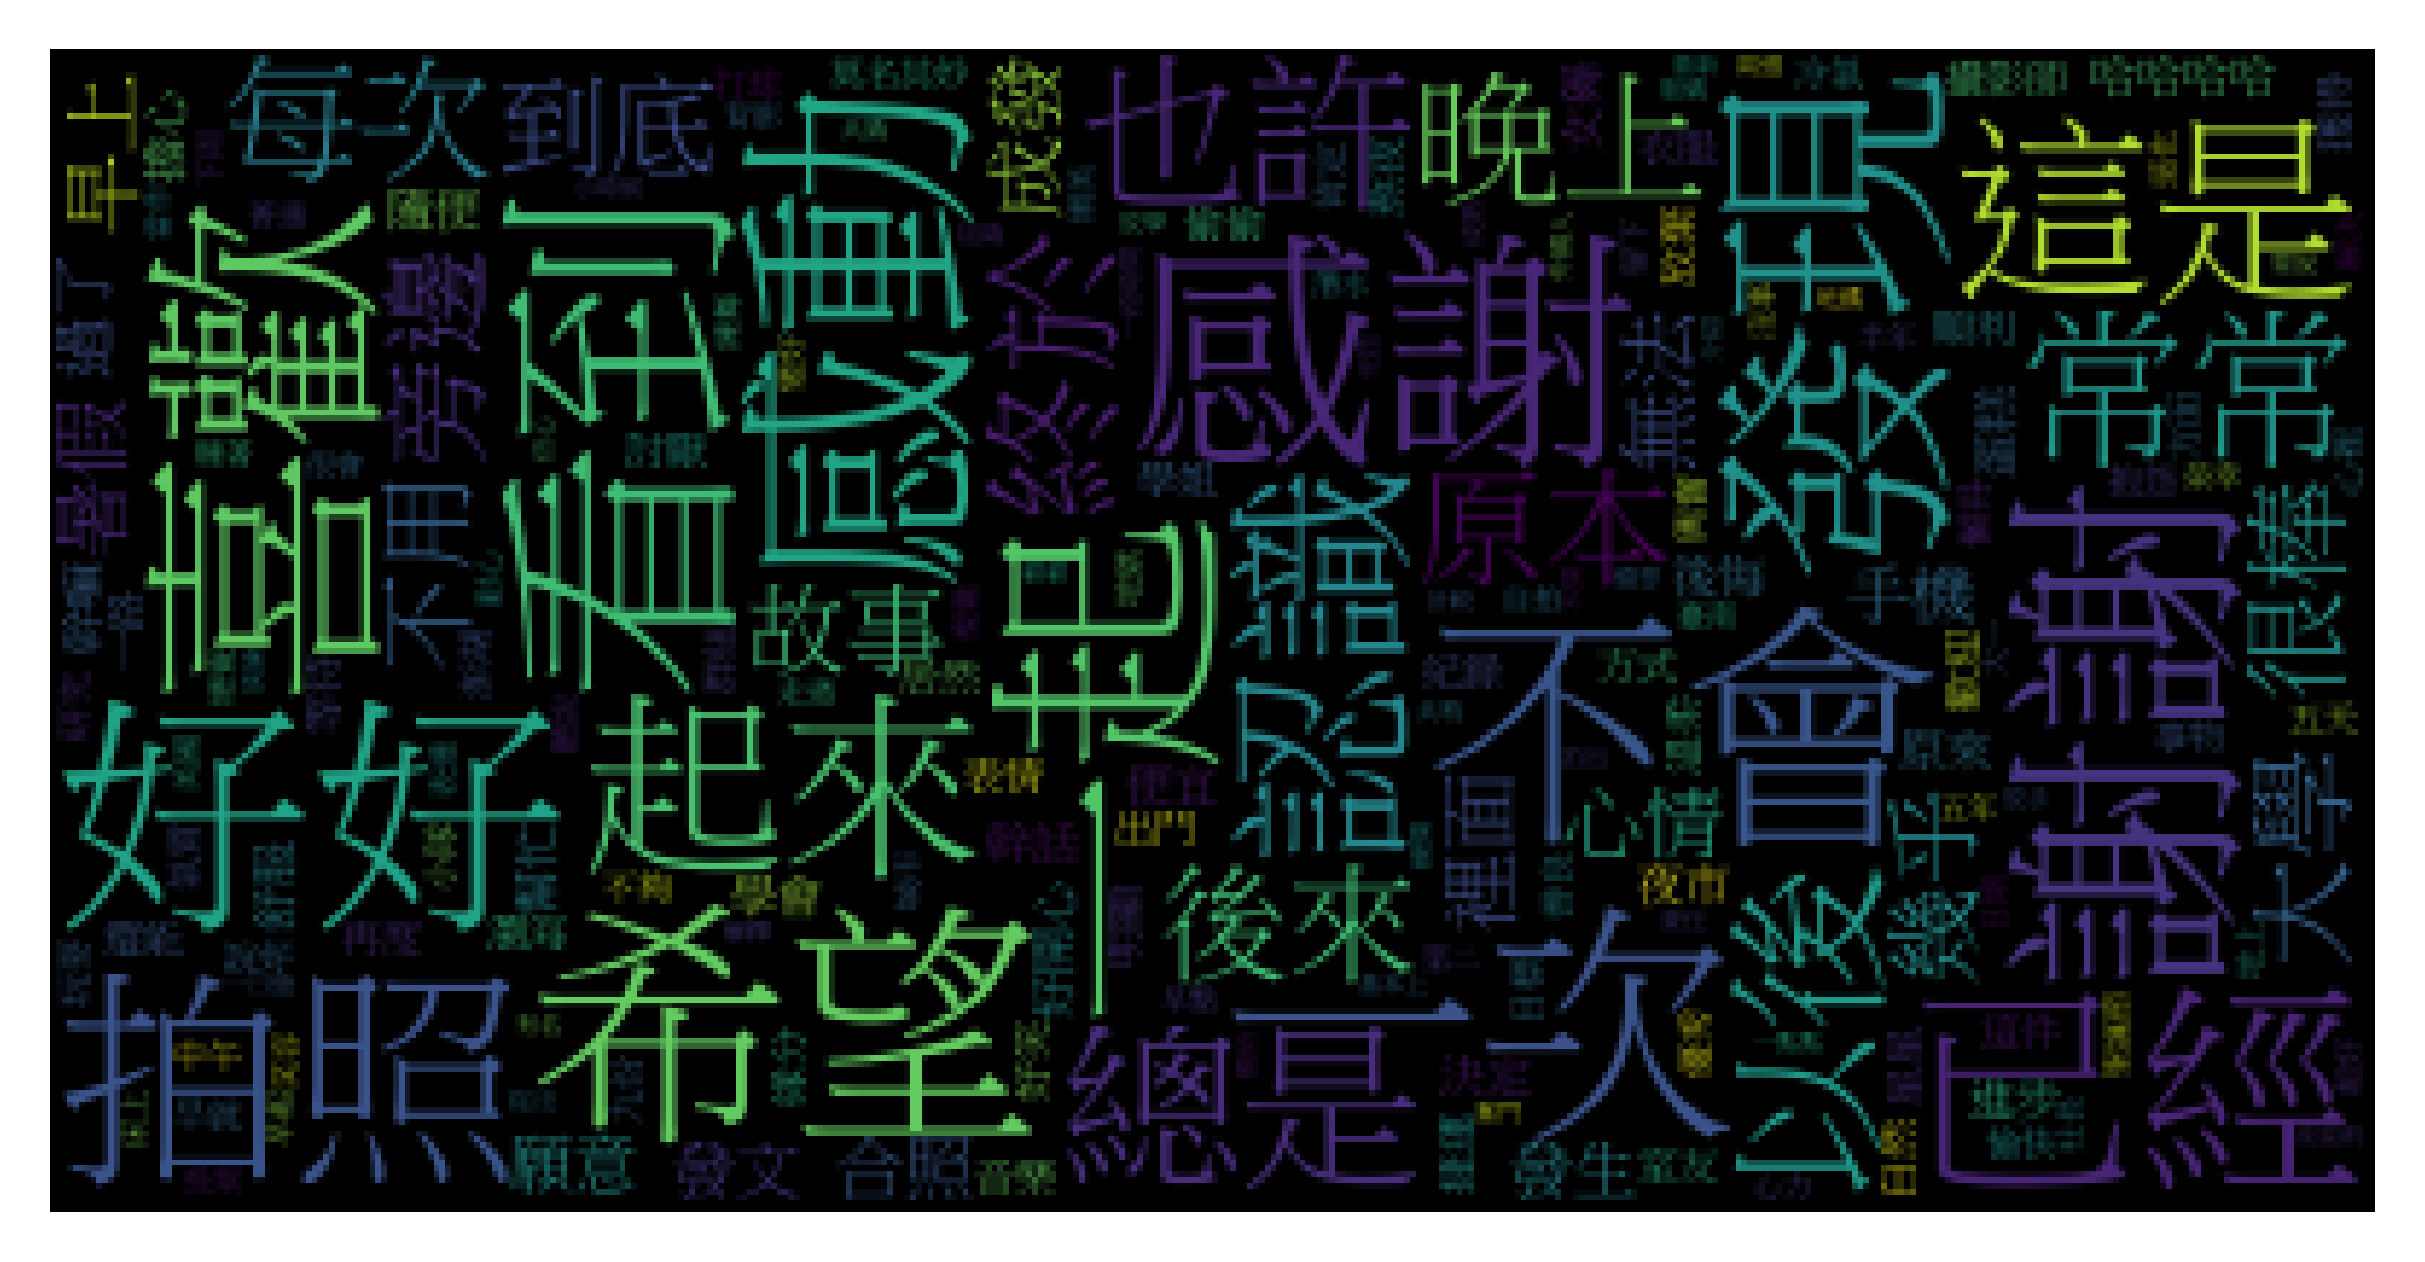

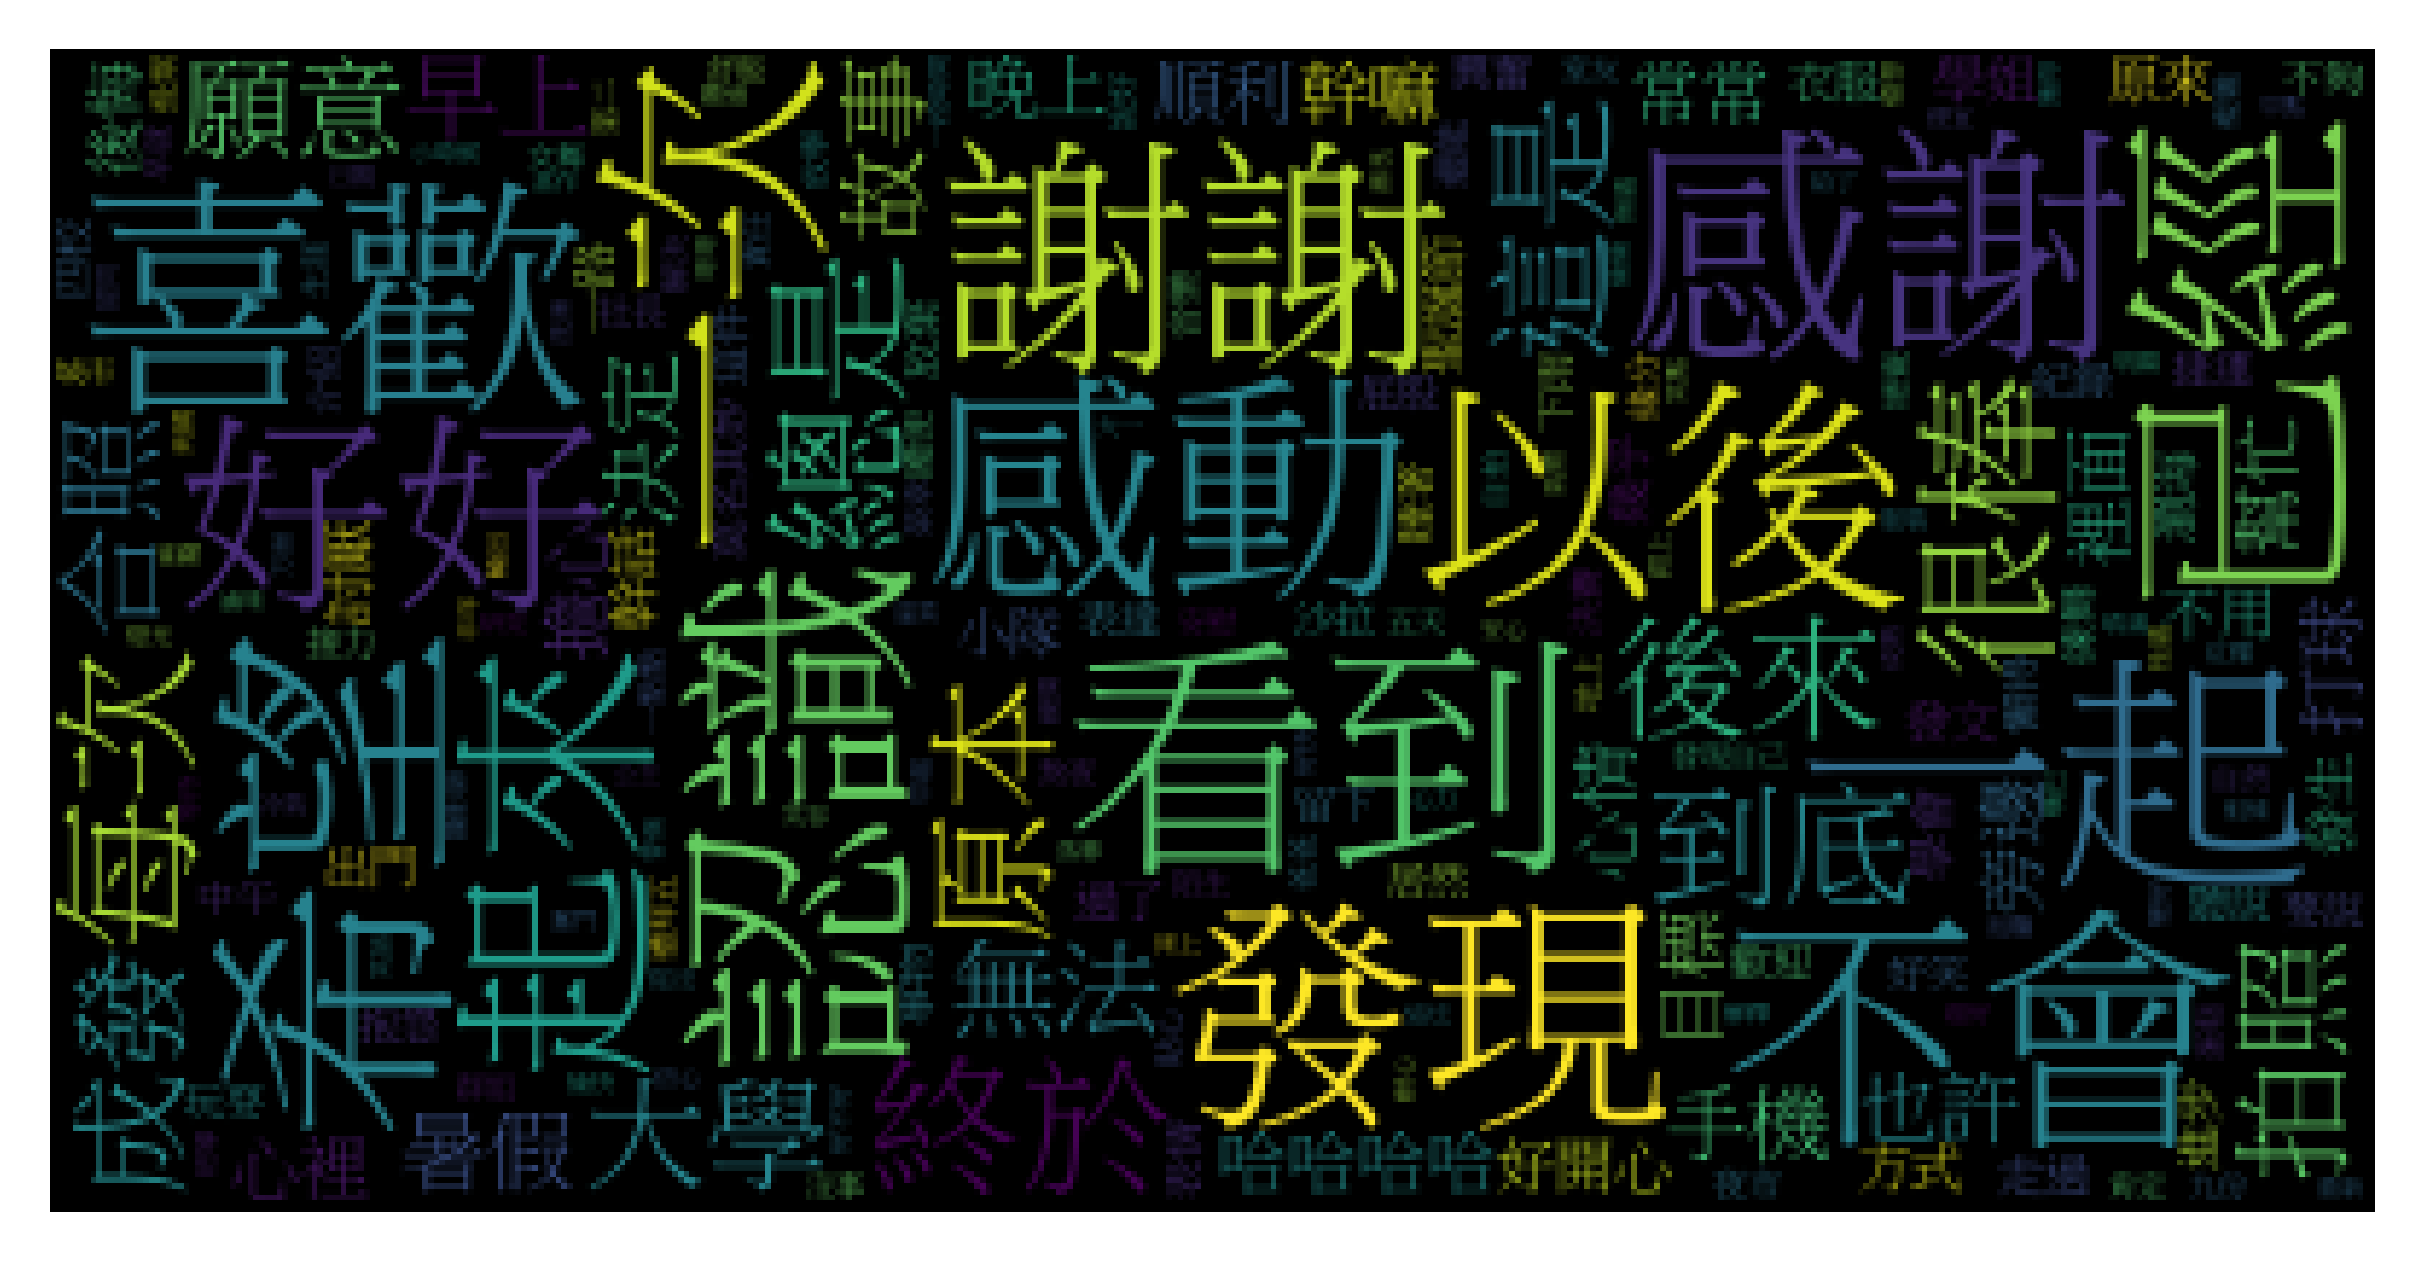

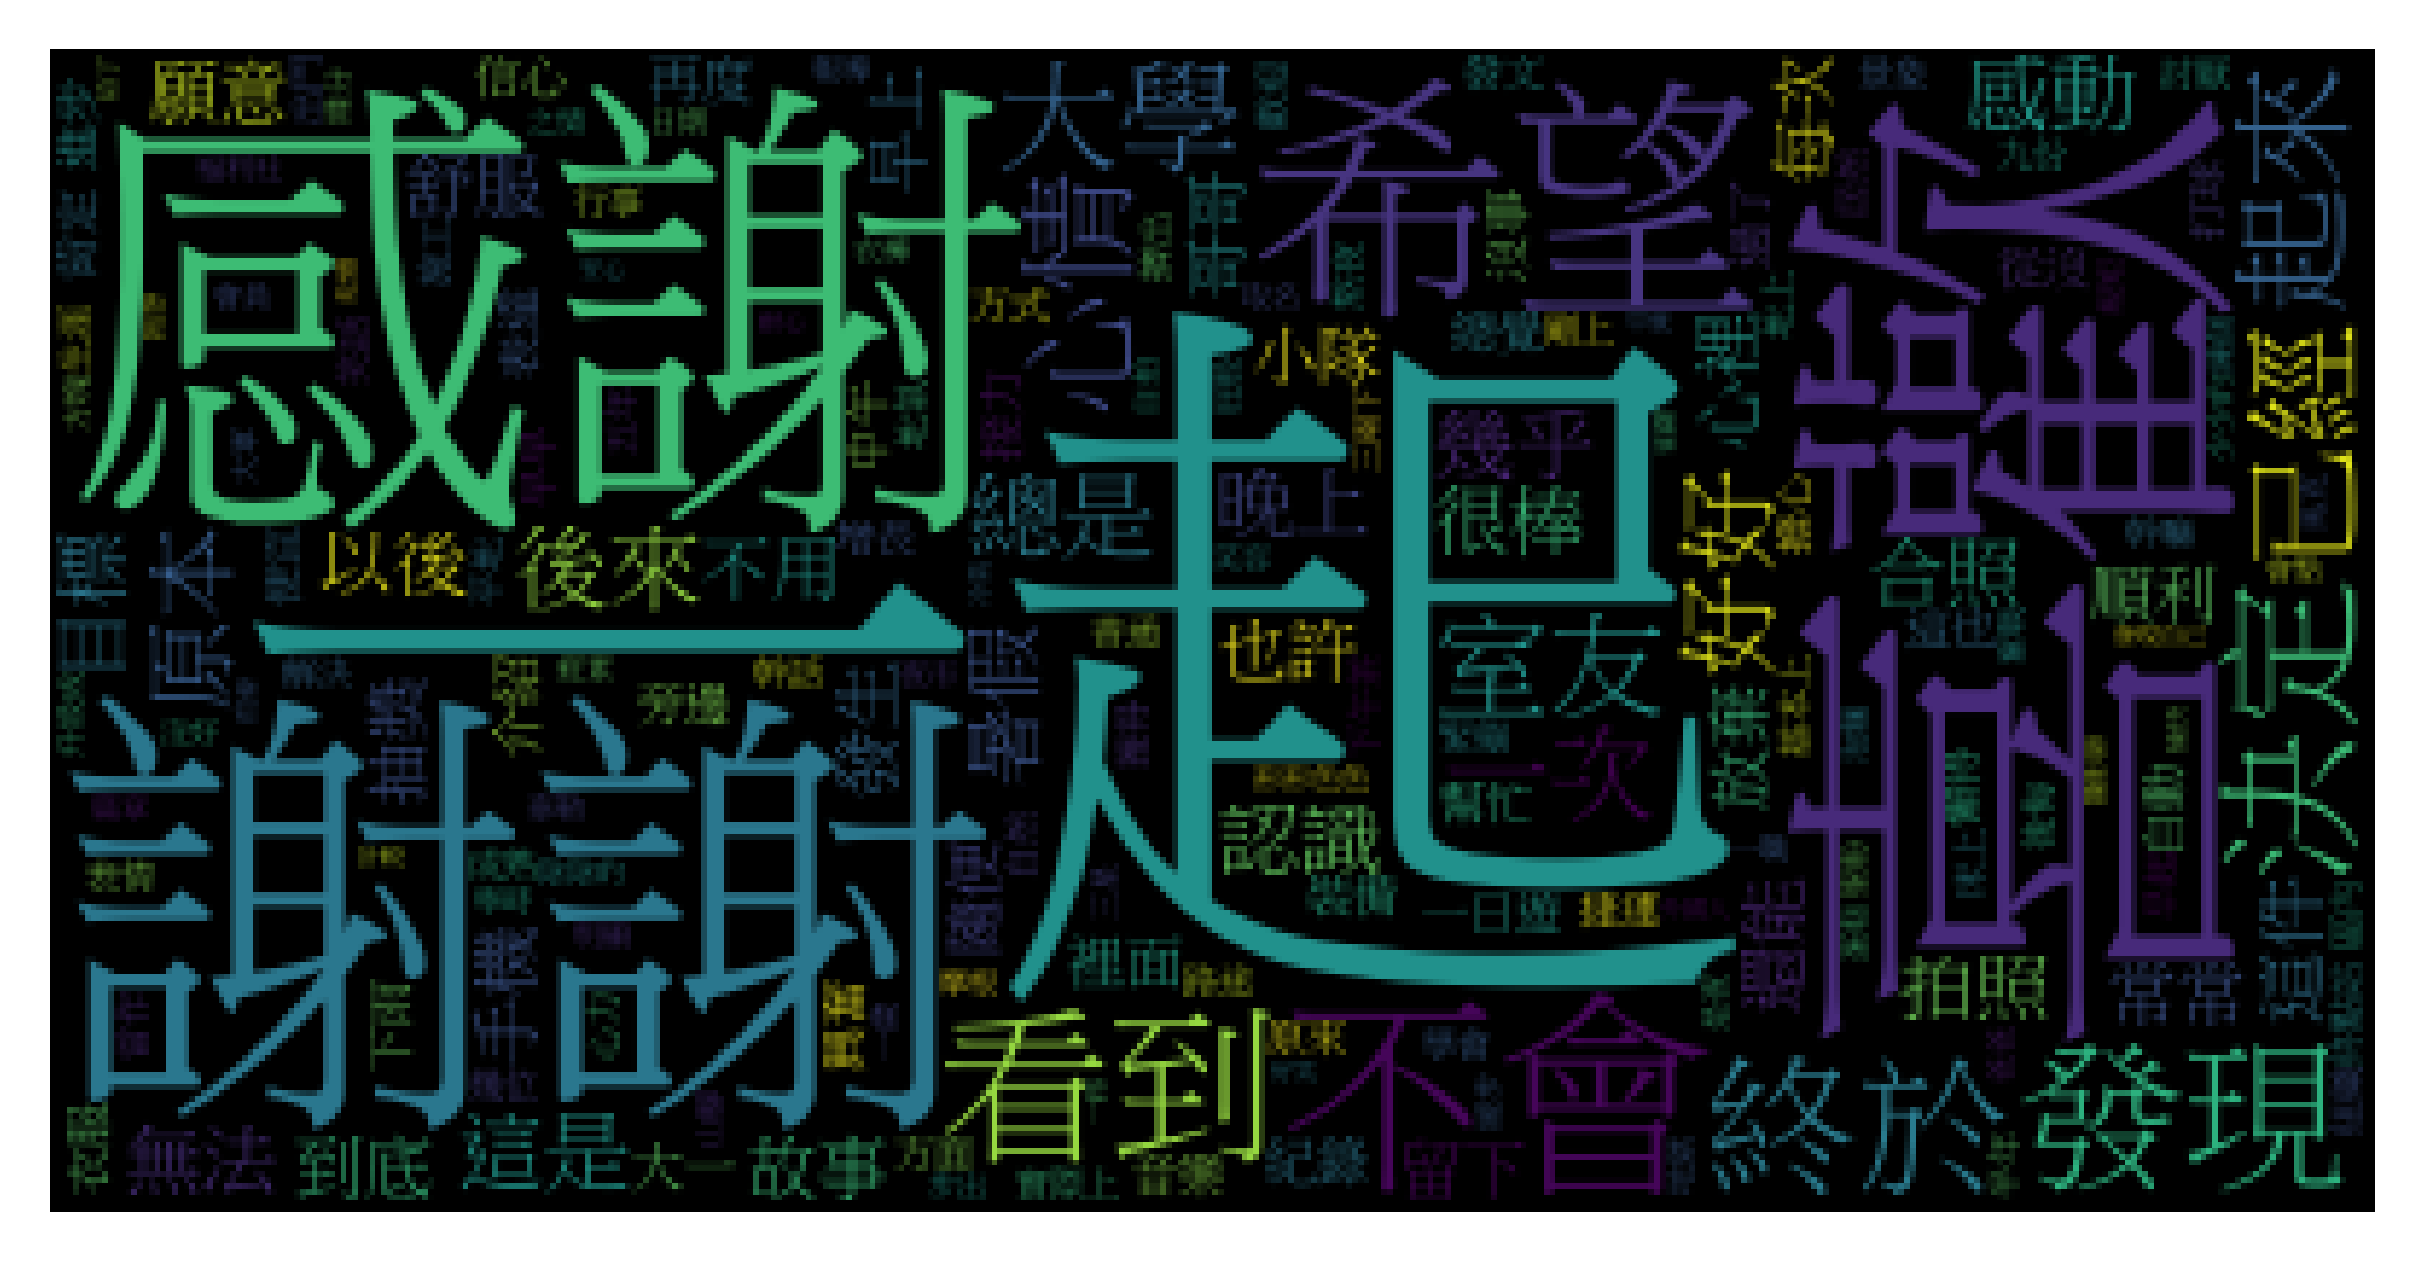

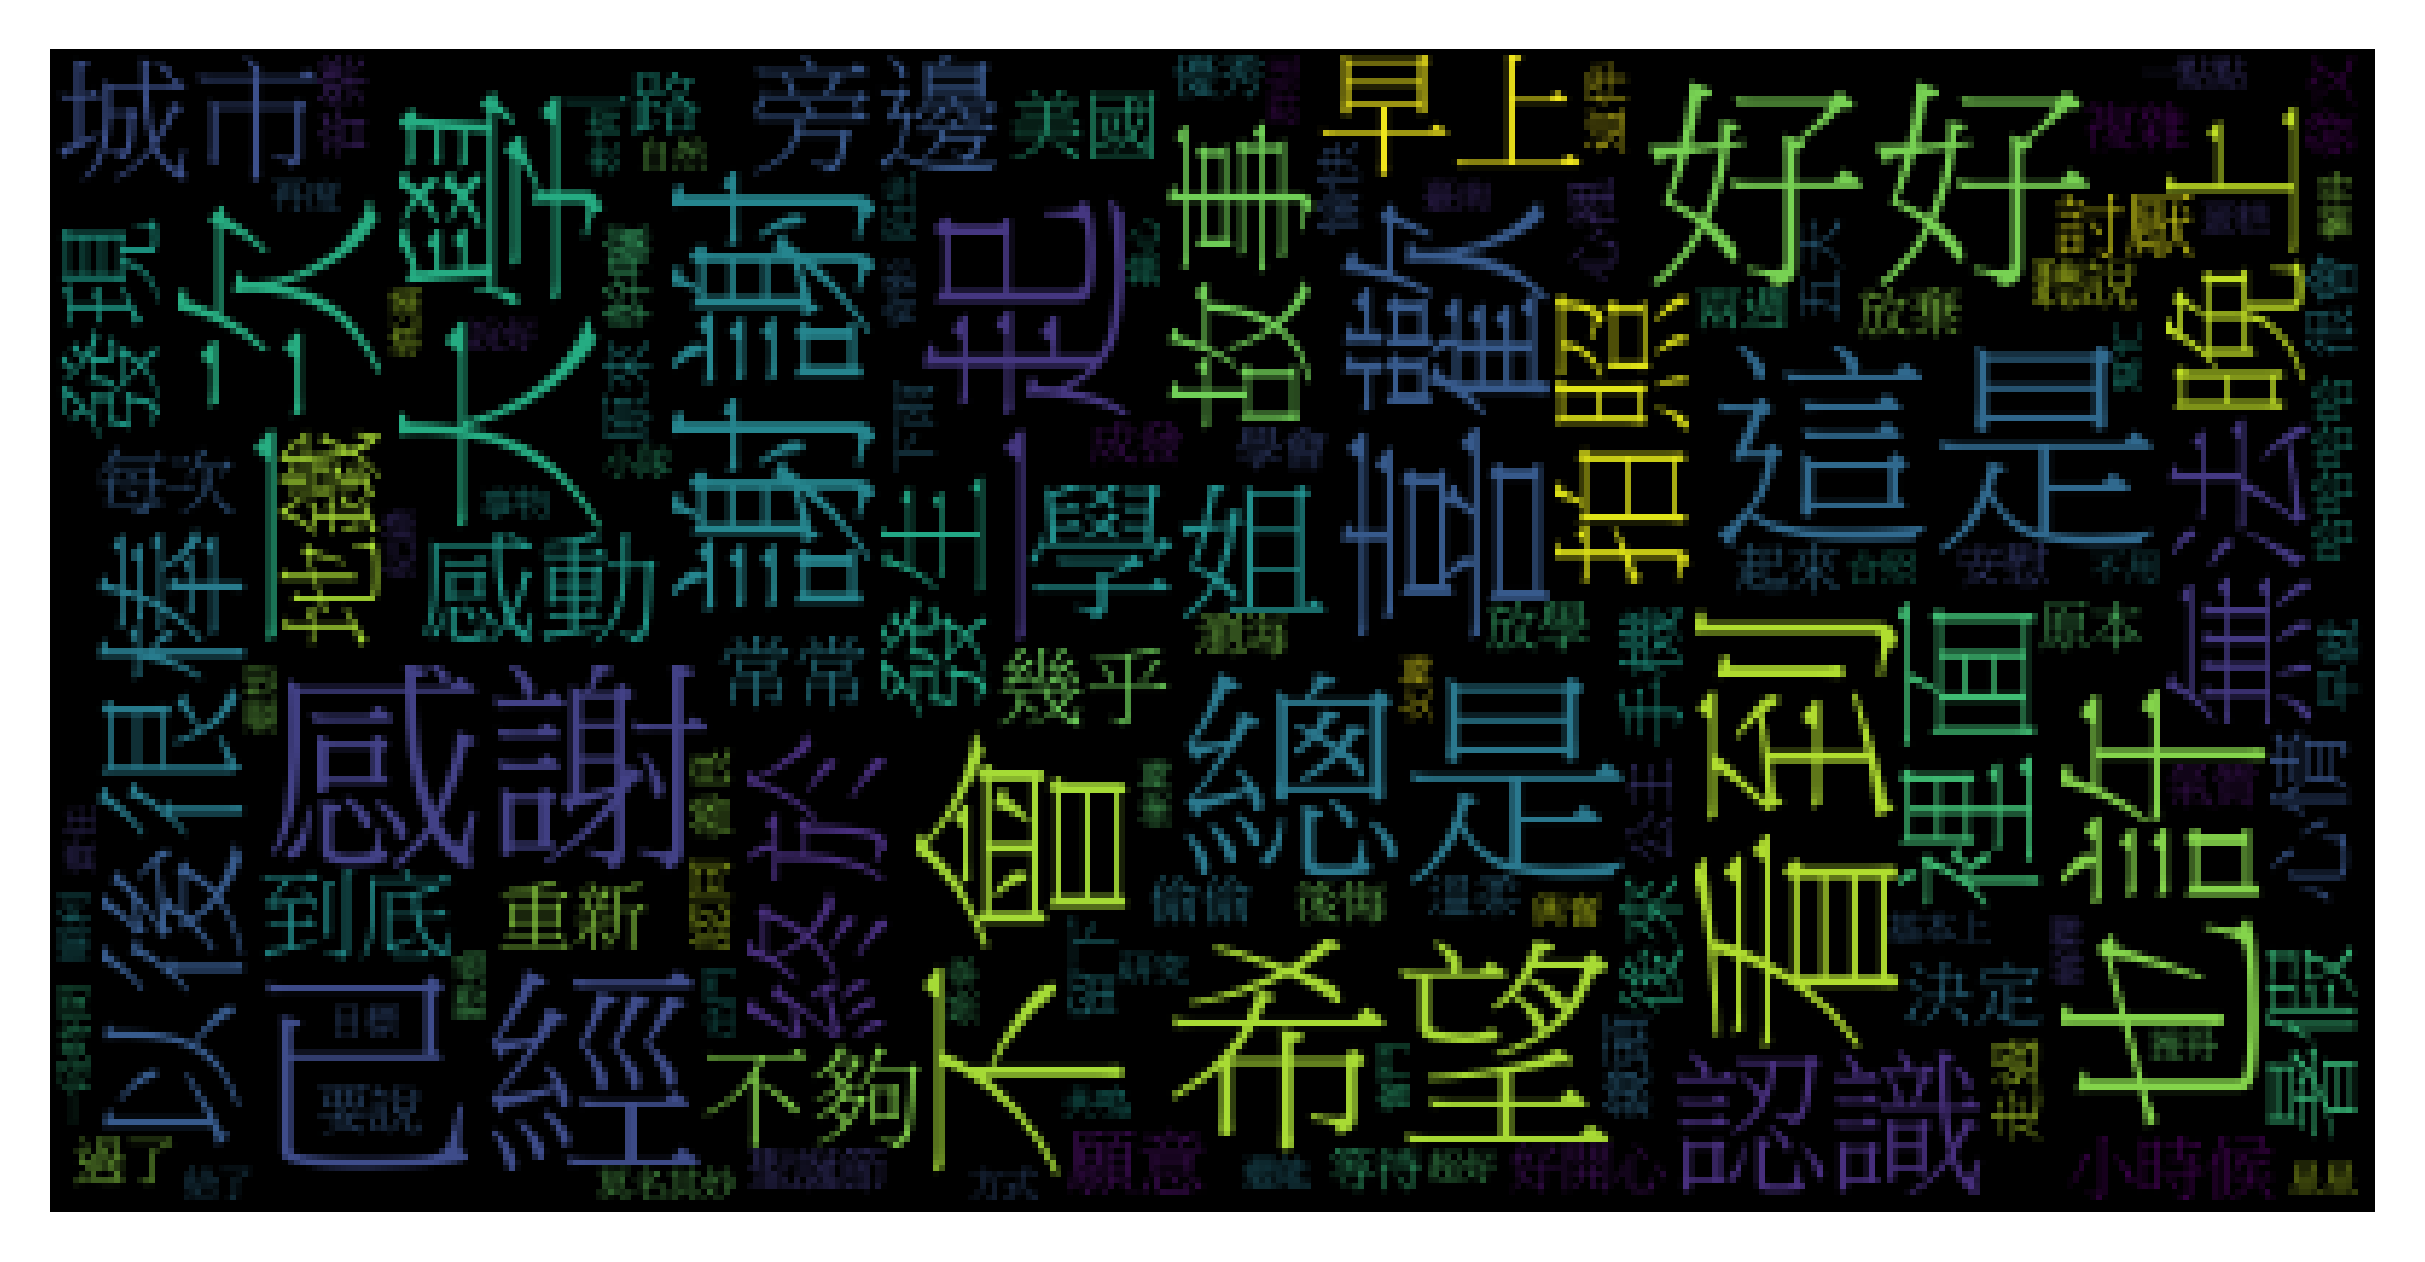

In [51]:
#for i in range(num_classes):
#    print(class_TFlist[i][:100])

'''文字雲(問卷資料)'''
def WordCloud(terms, saveplot=True, name=""):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    wc = WordCloud(font_path='C:\\Windows\\Fonts\\mingliu.ttc', 
               background_color="black",
               prefer_horizontal=0.5,
               max_words = 200)
    plt.figure(dpi = 500)
    wc.generate(" ".join(terms))
    plt.imshow(wc)
    plt.axis("off")
    if(saveplot):
        plt.savefig(name+"_plot.jpg")

for i in range(num_classes):
    lst = []
    length = len(class_TFlist[i])
    for j in range(length):
        if class_TFlist[i][:][j][0] in fea_extr_dictionary:   # in each_class_top[0]:
            lst.append(class_TFlist[i][:][j][0])
    print(lst[:20])
    WordCloud(lst, name="class_{}".format(str(i+1)))



In [43]:
fea_extr_dictionary[403]
fea_extr_dictionary.index('感謝')
fea_extr_dictionary[223]

'感謝'